In [2]:
import re
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guido\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
sw = stopwords.words('portuguese')
def limpar_caracteres_especiais(string):

    limpo= re.sub(r'[^\w\s]', '', string)
    menor=limpo.lower()
    return menor


In [4]:
def separa_palavra(lista):
    palavras=[]
    for frase in lista:
        palavra=frase.split()
        for e in palavra:
            palavras.append(e)
    palavras_series=pd.Series(palavras)
    tabela_palavras=palavras_series.value_counts()
    return tabela_palavras

In [5]:
def probabilidade_frase(frase,treino):
    
    Positivo=1
    Negativo=1
    Neutro=1
    frase_split=frase.split()
    treino_positivo = treino.loc[treino.Target=='Positivo' , :]
    treino_negativo = treino.loc[treino.Target=='Negativo' , :]
    treino_neutro = treino.loc[treino.Target=='Neutro' , :]
    palavras_t=separa_palavra(treino.Mensagem)
    palavras_p=separa_palavra(treino_positivo.Mensagem)
    palavras_neg=separa_palavra(treino_negativo.Mensagem)
    palavras_neu=separa_palavra(treino_neutro.Mensagem)
    todas=len(palavras_t)
    todas_positivas=sum(palavras_p.values)
    todas_negativas=sum(palavras_neg.values)
    todas_neutras=sum(palavras_neu.values)



    for i in frase_split:
        if i not in palavras_t:
            palavras_t[i]=0
        if i not in palavras_p:
            palavras_p[i]=0

        
        if i not in palavras_neg:
            palavras_neg[i]=0    
        
        
        if i not in palavras_neu:
            palavras_neu[i]=0 
        
        
        chance_pos=(palavras_p[i]+1)/(todas+todas_positivas)
        Positivo*=chance_pos
    
        chance_neg=(palavras_neg[i]+1)/(todas+todas_negativas)
        Negativo*=chance_neg

        chance_neu=(palavras_neu[i]+1)/(todas+todas_neutras)
        Neutro*=chance_neu

    
    if Negativo>Positivo and Negativo>Neutro:
        return ('Negativo')
    elif Positivo>Negativo and Positivo>Neutro:
        return ('Positivo')
    else:
        return('Neutro')
    


In [6]:
def acur(teste,treino):
    fpos=0
    ppos=0
    fneg=0
    pneg=0
    fneu=0
    pneu=0

    mensagem_treino=treino.Mensagem
    
    mensagem_treino = [limpar_caracteres_especiais(string) for string in mensagem_treino]
    
    
    for i in range(len(mensagem_treino)):
        mensagem_treino[i] = ' '.join([k for k in mensagem_treino[i].split(" ") if k not in sw])
    
    treino.Mensagem=mensagem_treino

    
    
    target=teste.Target.tolist()
    mensagem=teste.Mensagem
    
    mensagem = [limpar_caracteres_especiais(string) for string in mensagem]
    
    
    for i in range(len(mensagem)):
        mensagem[i] = ' '.join([k for k in mensagem[i].split(" ") if k not in sw])
    
    for i in range(len(target)):
        classi=probabilidade_frase(mensagem[i],treino)
        if target[i]=='Neutro':
            if classi==target[i]:
                pneu+=1
            else:
                fneu+=1
        if target[i]=='Positivo':
            if classi==target[i]:
                ppos+=1
            else:
                fpos+=1
        if target[i]=='Negativo':
            if classi==target[i]:
                pneg+=1
            else:
                fneg+=1
    
    resp=((ppos+pneu+pneg)/(ppos+fpos+pneg+fneg+pneu+fneu))*100
    
    return(resp)


In [7]:
total = pd.read_excel('dados/Total.xlsx')

In [8]:
from sklearn.model_selection import train_test_split
#treino, teste = train_test_split(mix, test_size=prop_teste,random_state=1)

acuracia = []

for i in range(100):
    dataframe = train_test_split(total, test_size=0.3)
    # Assuming acur function calculates accuracy
    treino=dataframe[0]
    teste=dataframe[1]
    x=acur(teste, treino)
    acuracia.append(x)
    print(x)




77.0
79.66666666666666
79.66666666666666
80.0
76.33333333333333
81.0
77.66666666666666
76.0
76.66666666666667
79.0
77.33333333333333
79.33333333333333
79.0
75.66666666666667
77.33333333333333
79.66666666666666
75.0
77.33333333333333
75.0
76.66666666666667
74.66666666666667
78.0
80.0
79.66666666666666
80.0
76.0
79.0
77.33333333333333
77.33333333333333
79.66666666666666
77.33333333333333
78.0
78.33333333333333
76.66666666666667
80.0
76.33333333333333
77.33333333333333
81.66666666666667
78.66666666666666
78.0
77.33333333333333
77.33333333333333
77.66666666666666
79.33333333333333
76.33333333333333
80.33333333333333
79.66666666666666
79.33333333333333
76.33333333333333
78.33333333333333
79.33333333333333
74.66666666666667
75.33333333333333
77.66666666666666
77.66666666666666
79.33333333333333
80.33333333333333
77.0
78.66666666666666
72.0
78.66666666666666
78.66666666666666
74.66666666666667
76.0
75.0
81.33333333333333
79.33333333333333
73.33333333333333
78.0
81.0
80.66666666666666
77.0
77.

In [9]:
print(max(acuracia))
print(min(acuracia))

83.0
72.0


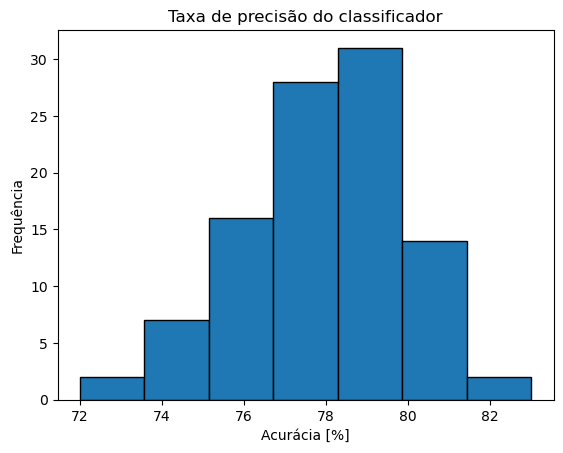

In [13]:
num_intervalos = 1 + int(np.log2(len(acuracia)))

# Hist
plt.hist(acuracia, bins=num_intervalos, edgecolor='black')

plt.xlabel('Acurácia [%]')
plt.ylabel('Frequência')
plt.title('Taxa de precisão do classificador')

plt.show()